# RANSAC

## import library

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np #########

## Generate points

In [3]:

# Set random seed for reproducibility
random.seed(42)

# Generate fixed set of points
points = []
# Inliers: roughly along the line y = 2x + 1 with some noise
for _ in range(30):
    x = random.uniform(0, 10)
    y = 2 * x + 1 + random.uniform(-1, 1)  # Small noise
    points.append((x, y))
# Outliers: random points
for _ in range(10):
    x = random.uniform(0, 10)
    y = random.uniform(0, 15)
    points.append((x, y))

# Convert to list of (x, y) tuples that won't change
points = [(x, y) for x, y in points]




## distance to line

In [2]:

def distance_to_line(x0, y0, x1, y1, x2, y2):
    # find y = mx + h
    m = (y2 - y1) / (x2 - x1) if x2 != x1 else None
    h = y1 - m * x1 if m != None else None
    # find distance with mx - y + h = 0
    if m != None:
        num = np.abs(m * x0 - y0 + h)
        denom = np.sqrt(m**2 + 1)
    else:
        num = np.abs(x0 - x1)
        denom = 1 if y1 != y2 else 0
    return num / denom if denom != 0 else float('inf')


## fit line

In [4]:
def fit_line(x1, y1, x2, y2):
    m = (y2 - y1) / (x2 - x1) if x2 != x1 else None
    b = y1 - m * x1 if m != None else None
    return m, b 

## ransac line fit

Inputs: points (list of (x, y) tuples), n_iterations (number of tries), threshold (max distance for inliers)

###Steps:
1. Randomly pick two points to define a line
2. Use fit_line to get the slope and intercept
3. Find all points within the threshold distance to the line (inliers)
4. Keep track of the line with the most inliers
5. For each iteration, plot the current line, inliers (blue), and outliers (red) with a pause
6. After all iterations, plot the best line with its inliers and outliers
######Return: best_model (slope, intercept), best_inliers (list of inlier points)

In [10]:
#TODO: Implement the RANSAC algorithm to fit a line to the points

def ransac_line_fit(points, n_iterations=20, threshold=0.5):
    best_inliers = []
    best_model = None
    best_num_inliers = 0

    for iteration in range(n_iterations):
        # Step 1: Randomly select two points (hint: use random.sample)
        #TODO: Implement point selection
        samples = random.sample(points, 2)
        point1 = samples[0]
        point2 = samples[1]

        # Step 2: Define the line
        #TODO: Call fit_line with your selected points
        m, b = fit_line(point1[0], point1[1], point2[0], point2[1])

        # Step 3: Find inliers
        inliers = []
        outliers = []
        #TODO: Loop through points, calculate distances, and classify as inliers or outliers
        # Hint: Use distance_to_line; handle vertical lines (infinite slope) separately
        for point in points:
            dist = distance_to_line(point[0], point[1], point1[0], point1[1], point2[0], point2[1])
            if dist <= threshold:
                inliers.append(point)
            else:
                outliers.append(point)

        # Step 4: Update best model if current model has more inliers
        #TODO: Compare number of inliers and update best_model, best_inliers, best_num_inliers
        if len(inliers) > best_num_inliers:
            best_num_inliers = len(inliers)
            best_inliers = inliers
            best_model = (m, b)


        # Step 5: Visualize current iteration (provided, but use your variables)
        plt.clf()
        if inliers:
            in_x, in_y = zip(*inliers)
            plt.scatter(in_x, in_y, color='blue', label='Inliers')
        if outliers:
            out_x, out_y = zip(*outliers)
            plt.scatter(out_x, out_y, color='red', label='Outliers')
        # Plot the current line
        if m != float('inf'):
            x_vals = [0, 10]
            y_vals = [m * x + b for x in x_vals]
            plt.plot(x_vals, y_vals, 'g--', label='Current Line')
            eq_str = f"y = {m:.2f}x + {b:.2f}"
        else:
            plt.axvline(x=b, color='g', linestyle='--', label='Current Line')
            eq_str = f"x = {b:.2f}"
        plt.title(f"Iteration {iteration + 1}/{n_iterations}, Inliers: {len(inliers)}, {eq_str}")
        plt.legend()
        plt.xlim(0, 10)
        plt.ylim(0, 15)
        plt.pause(0.5)

    # Final plot with best model (provided, but use your best_model)
    plt.clf()
    in_x, in_y = zip(*best_inliers) if best_inliers else ([], [])
    out_x, out_y = zip(*[p for p in points if p not in best_inliers])
    plt.scatter(in_x, in_y, color='blue', label='Inliers')
    plt.scatter(out_x, out_y, color='red', label='Outliers')
    if best_model[0] != float('inf'):
        x_vals = [0, 10]
        y_vals = [best_model[0] * x + best_model[1] for x in x_vals]
        plt.plot(x_vals, y_vals, 'g--', label='Best Fit Line')
        final_eq = f"y = {best_model[0]:.2f}x + {best_model[1]:.2f}"
    else:
        plt.axvline(x=best_model[1], color='g', linestyle='--', label='Best Fit Line')
        final_eq = f"x = {best_model[1]:.2f}"
    plt.title(f"Final Result, Best Inliers: {best_num_inliers}, {final_eq}")
    plt.legend()
    plt.xlim(0, 10)
    plt.ylim(0, 15)
    plt.show()

    return best_model, best_inliers

## Run RANSAC

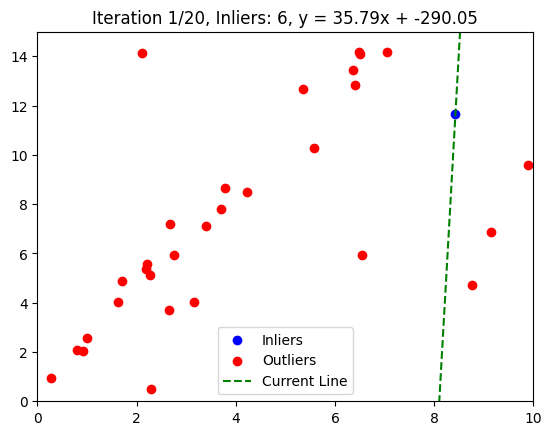

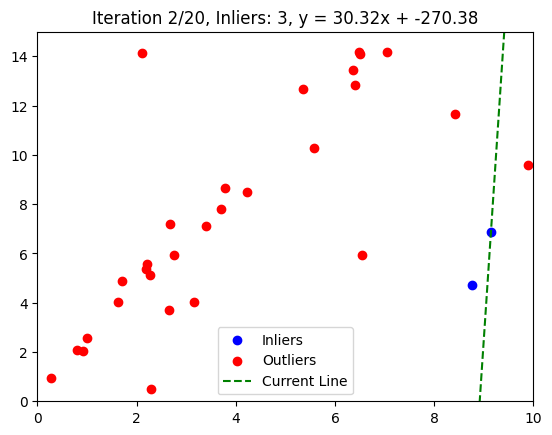

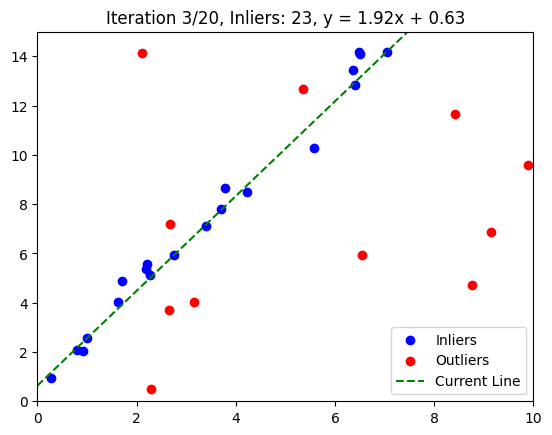

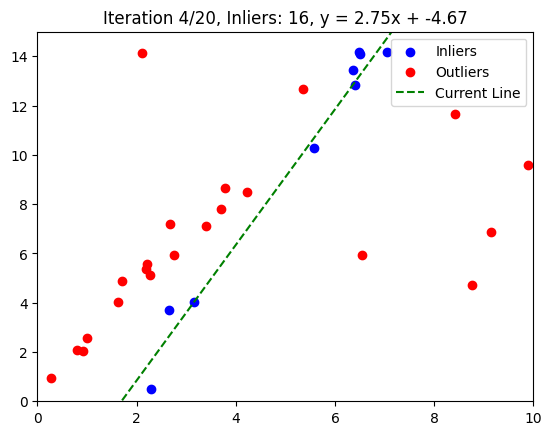

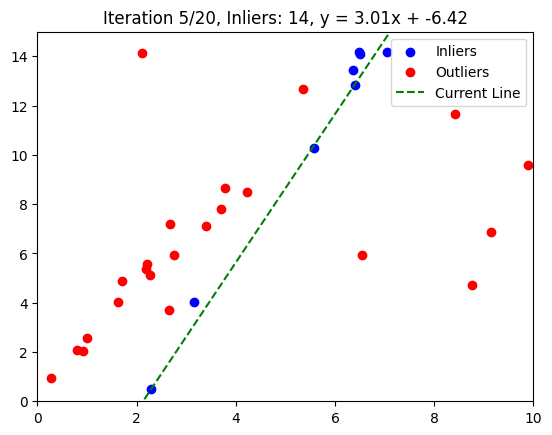

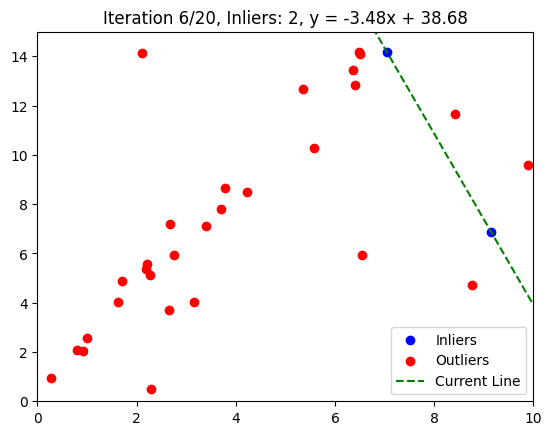

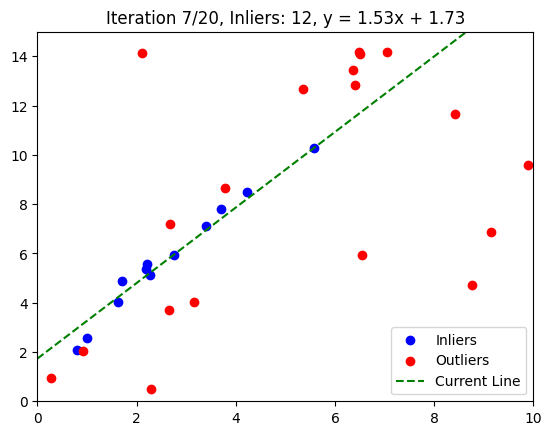

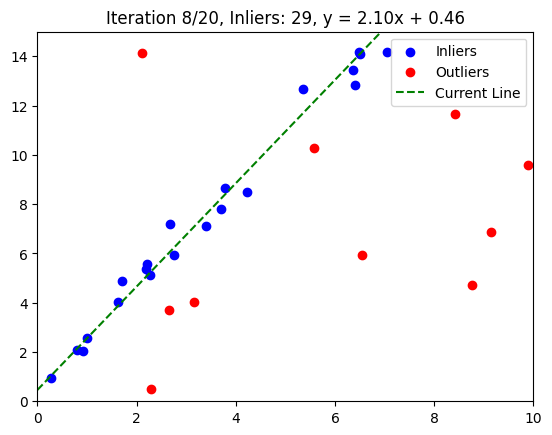

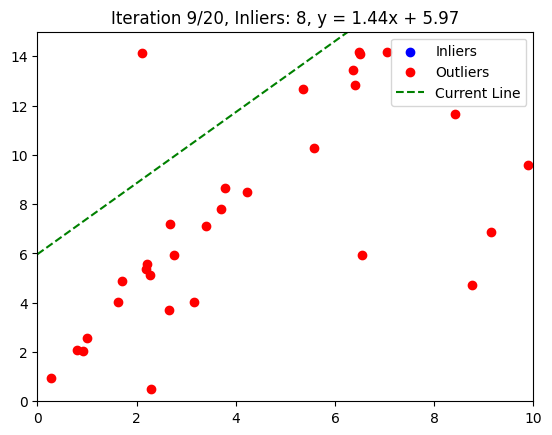

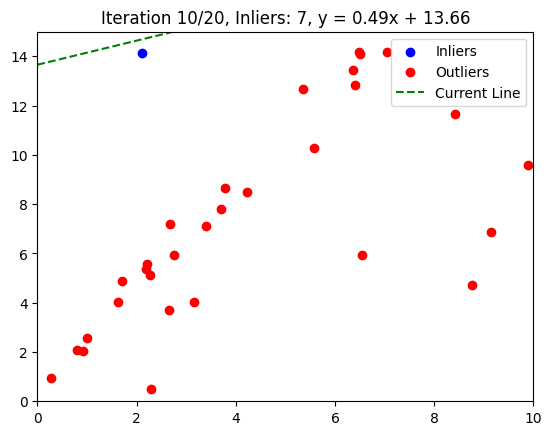

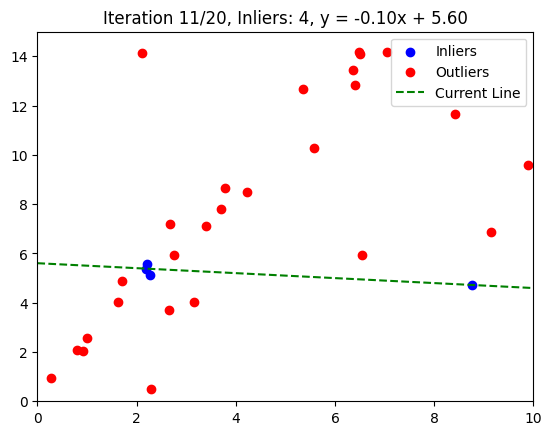

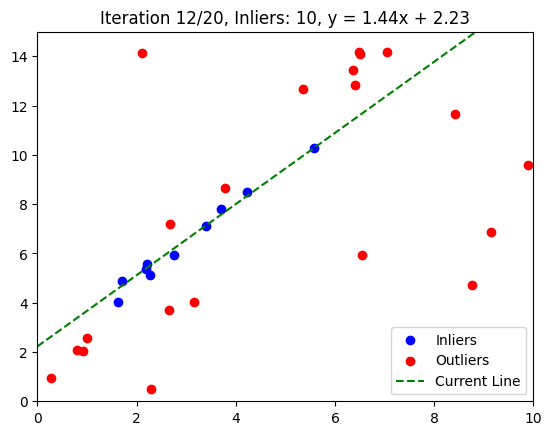

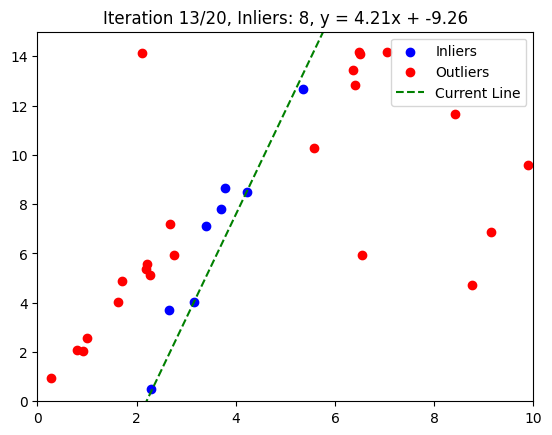

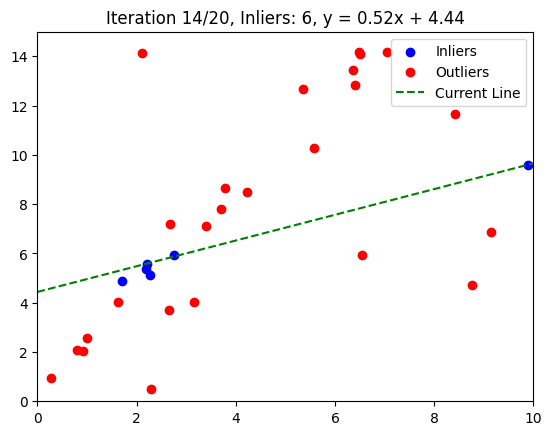

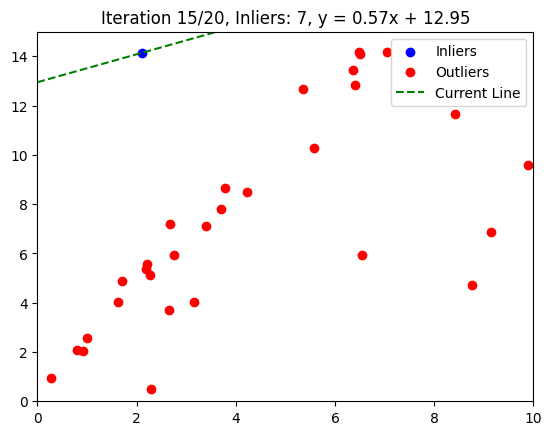

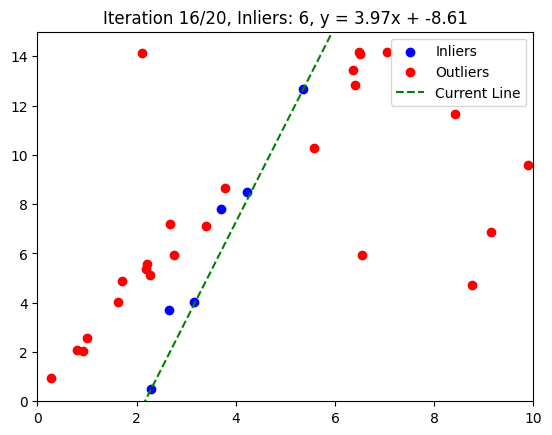

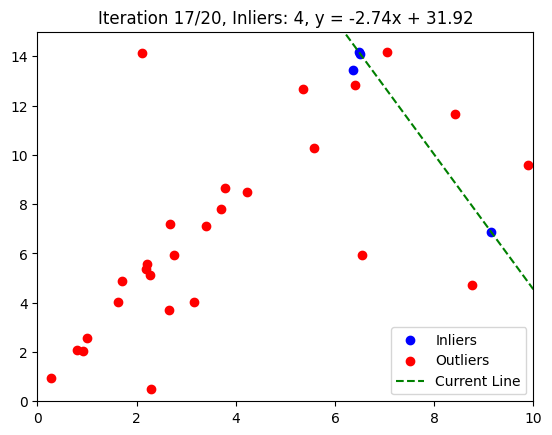

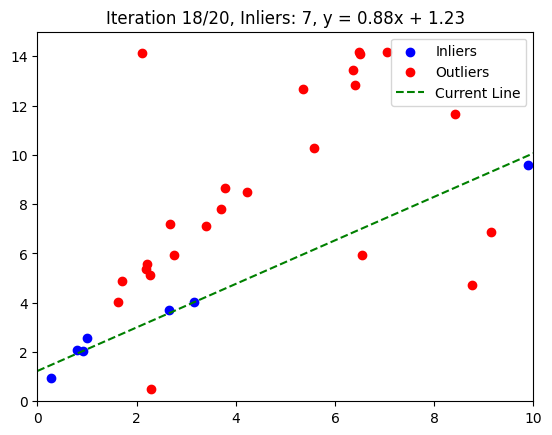

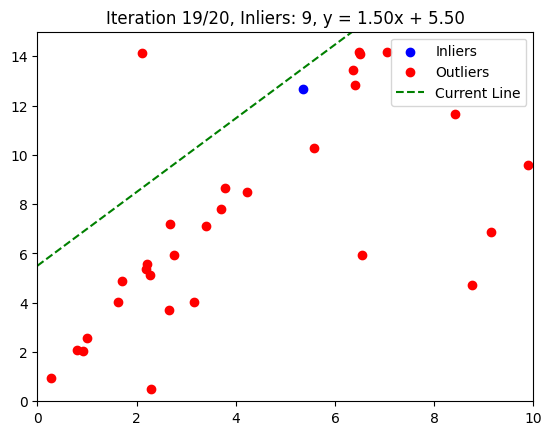

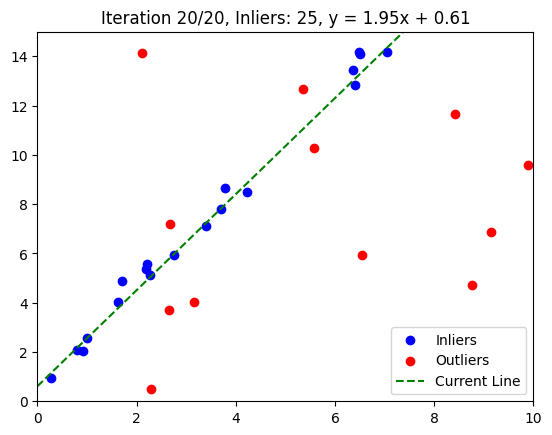

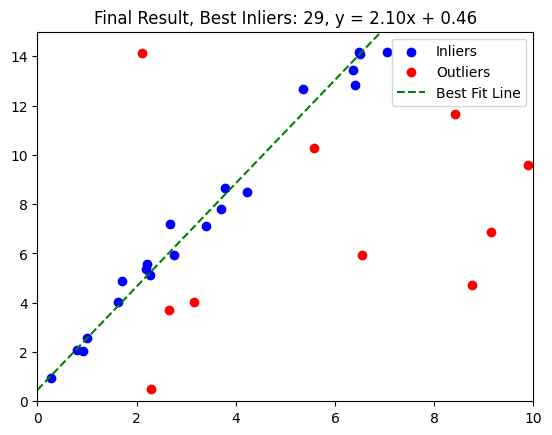

Best line: slope = 2.0972767870100517, intercept = 0.4576962608561743


In [11]:
best_model, best_inliers = ransac_line_fit(points)
print(f"Best line: slope = {best_model[0]}, intercept = {best_model[1]}")

# RANSAC application

## import library

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## load images

In [2]:

object_img = cv2.imread('Meerkat.jpg', cv2.IMREAD_GRAYSCALE)  # object
scene_img = cv2.imread('animals.jpg', cv2.IMREAD_GRAYSCALE)   # Scene image with objects

if object_img is None or scene_img is None:
    raise Exception("Images not found. Please provide 'Meerkat.jpg' and 'animals.jpg'.")

## Homography & RANSAC application

In [10]:
# Feature Detection and Description (using SIFT)
sift = cv2.SIFT_create()
kp_obj, des_obj = sift.detectAndCompute(object_img, None)
kp_scene, des_scene = sift.detectAndCompute(scene_img, None)


# Feature Matching (using KNN with ratio test)
bf = cv2.BFMatcher()
matches = bf.knnMatch(des_obj, des_scene, k=2)


# Apply ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:  # Lowe's ratio test
        good_matches.append(m)


# Draw matches for visualization
img_matches = cv2.drawMatches(object_img, kp_obj, scene_img, kp_scene, good_matches, None,
                             flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Homography Estimation with RANSAC
if len(good_matches) >= 4:  # Minimum 4 points needed for homography
    # Extract source (object) and destination (scene) points from good matches
    # Hint: Use kp_obj[m.queryIdx].pt and kp_scene[m.trainIdx].pt, reshape to (-1, 1, 2)
    src_pts = np.float32([kp_obj[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp_scene[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5) # : Compute the homography matrix using RANSAC
              # Hint: Use findHomography with RANSAC and a reasonable threshold (e.g., 5.0)

    matches_mask = mask.ravel().tolist()
else:
    raise Exception("Not enough good matches found (need at least 4).")


# Perspective Transform to Locate Object
h, w = object_img.shape
obj_corners = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2)
scene_corners = cv2.perspectiveTransform(obj_corners, H)

# Draw object boundary on scene image
scene_color = cv2.cvtColor(scene_img, cv2.COLOR_GRAY2BGR)
cv2.polylines(scene_color, [np.int32(scene_corners)], True, (0, 255, 0), 2)

# Step 5: Histogram Verification (RGB and HSV)
# Warp the scene region back to object size for comparison
quad = np.zeros_like(object_img, dtype=np.uint8)
H_inv = np.linalg.inv(H)  # Inverse homography to warp scene to object
scene_color_full = cv2.imread('animals.jpg')
warped_scene = cv2.warpPerspective(scene_color_full, H_inv, (w, h))


# Convert images to HSV and compute histograms for verification
# Hint: Convert to HSV with cv2.cvtColor, compute histograms on Hue channel with cv2.calcHist
obj_hsv = cv2.cvtColor(scene_color, cv2.COLOR_BGR2HSV)
warped_hsv = cv2.cvtColor(warped_scene, cv2.COLOR_BGR2HSV)

hist_obj = cv2.calcHist([obj_hsv], [0], None, [256], [0, 256])
hist_warped = cv2.calcHist([warped_hsv], [0], None, [256], [0, 256])

cv2.normalize(hist_obj, hist_obj)
cv2.normalize(hist_warped, hist_warped)

# Compare histograms (Bhattacharyya distance)
hist_diff = cv2.compareHist(hist_obj, hist_warped, cv2.HISTCMP_BHATTACHARYYA)
print(f"Histogram Bhattacharyya Distance: {hist_diff:.4f}")
verification_threshold = 0.5  # Adjust based on testing
if hist_diff < verification_threshold:
    print("Object verified by histogram comparison!")
else:
    print("Object not verified by histogram comparison.")


Histogram Bhattacharyya Distance: 0.6249
Object not verified by histogram comparison.


## show result

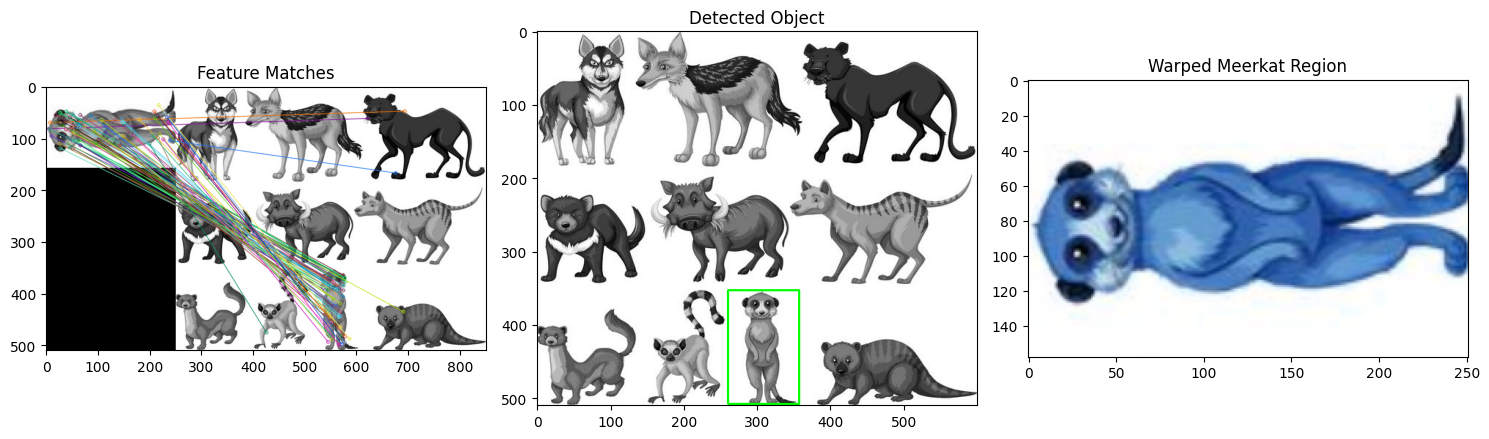

In [11]:
plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(img_matches), plt.title('Feature Matches')
plt.subplot(132), plt.imshow(scene_color), plt.title('Detected Object')
plt.subplot(133), plt.imshow(warped_scene), plt.title('Warped Meerkat Region')
plt.tight_layout()
plt.show()